### Etsy

In [21]:
from collections.abc import MutableMapping
import json
import csv
import os 
import pandas as pd

def _write_to_csv(csv_file, files):
    headers = ['Name', 'URL', 'SKU', 'Description', 'Category', 
               'Brand','Rating Value', 'Review Count', 'Price', 'Price Currency', 
               'Availability', 'Material', 'Review', 'Rate', 'Reviewer', 'Review Date']
    
    # Write headers to the CSV file
    for f in files:
        with open(f, 'r', encoding = 'utf-8') as file:
            f = json.load(file)
            with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                    writer.writerow(headers)
                for product in f:
                    # For each product, we extract required data, handle missing values with `.get()` method
                    url = product.get('url', '')
                    name = product.get('name', '')
                    sku = product.get('sku', '')
                    description = product.get('description', '').replace('\n', ' ')
                    category = product.get('category', '')
                    
                    brand = product.get('brand', {}).get('name', '')
                    
                    rating_value = product.get('aggregateRating', {}).get('ratingValue', '')
                    total_review_count = product.get('aggregateRating', {}).get('reviewCount', '')

                    price = product.get('offers', {}).get('price', '')
                    price_currency = product.get('offers', {}).get('priceCurrency', '')
                    availability = product.get('offers', {}).get('availability', '')
                    
                    material = product.get('material', '')
                    
                    # Handling the first review data
                    if 'review' in product and len(product['review']) > 0:
                        for item in product['review']:
                            review = item.get('reviewBody', '')
                            rate = item.get('reviewRating', {}).get('ratingValue', '') 
                            reviewer = item.get('author', {}).get('name', '') 
                            review_date = item.get('datePublished', '')
                            writer.writerow([name, url, sku, description, category, 
                            brand, rating_value, total_review_count, price, price_currency, 
                            availability, material, review, rate, reviewer, review_date])
                    else:
                        review = rate = reviewer = review_date = ''
                        writer.writerow([name, url, sku, description, category, 
                        brand, rating_value, total_review_count, price, price_currency, 
                        availability, material, review, rate, reviewer, review_date])
                    
                    # Write the row for each product


    print(f'Data has been successfully written to {csv_file}')

%pwd

'C:\\Users\\tianc\\scrapfly-scrapers\\amazon-scraper\\results'

In [22]:
%cd ~/scrapfly-scrapers/etsy-scraper/results/

# csv_file = 'etsy_reviews_.csv'

# files = ['products_null.json']
# _write_to_csv(csv_file, files)


C:\Users\tianc\scrapfly-scrapers\etsy-scraper\results


In [ ]:
file = pd.read_csv('etsy_reviews_.csv')
file = file.dropna(subset = 'Review')
# file.to_excel('etsy_r.xlsx')
file

##### sent with vader

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
file = file.dropna(subset = 'Review').drop_duplicates().reset_index(drop = True)

analyzer = SentimentIntensityAnalyzer()
vs = [analyzer.polarity_scores(sentence) for sentence in file['Review']]

file[list(vs[0].keys())] = [[v[k] for k in vs[0].keys()] for v in vs]
file['sentiment'] = file.compound.apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

file.to_csv('etsy_reviews_w_sentiment.csv', index = False)
file.to_excel('etsy_reviews_w_sentiment.xlsx', index = False)

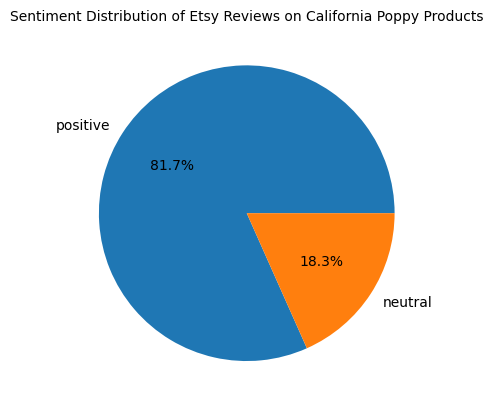

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

file.sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax,)
ax.set_ylabel('')
ax.set_title('Sentiment Distribution of Etsy Reviews on California Poppy Products', size = 10)
fig.savefig('sentiment_distribution_etsy.png', dpi = 300)

### TrustPilot

In [1]:
from collections.abc import MutableMapping
import json
import csv
import os 
import pandas as pd

def _write_to_csv(csv_file, files):
    headers = ['Company', 'Website', 'Id', 'Source',
               'Trust Score (if from TrustPilot)', 'Review Count', 'Review Source','Title', 'Rate', 'Review', 'Likes', 'Reply', 'Reviewer', 'Review Date', 'Total Reviews by Reviewer', 
               'Language', 'Country Code']
    
    # Write headers to the CSV file
    for i in range(0, len(files), 2):
        company = files[i]
        reviews = files[i+1]
        with open(company, 'r', encoding = 'utf-8') as f1, open(reviews, 'r', encoding = 'utf-8') as f2:    
            company = json.load(f1)[0]
            reviews = json.load(f2)
            with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                    writer.writerow(headers)
                Company =  company.get('companyDetails', {}).get('displayName', '')
                Website = company.get('companyDetails', {}).get('websiteUrl', '')
                Id = company.get('companyDetails', {}).get('id', '')
                Source = company.get('pageUrl', '')
                Trust_Score = company.get('companyDetails', {}).get('trustScore', '')
                Review_Count = company.get('companyDetails', {}).get('numberOfReviews', '')
                for r in reviews:
                    ReviewSource = r.get('labels', {}).get('verification', {}).get('reviewSourceName', '')
                    Title = r.get('title', '')
                    Rate = r.get('rating', '')
                    Review = r.get('text', '')
                    Likes = r.get('likes', '')
                    Reply = r.get('reply', '')
                    Reviewer = r.get('consumer', {}).get('displayName', '') or r.get('consumer', {}).get('id', '')
                    ReviewDate = r.get('dates', {}).get('publishedDate', '')
                    TotalReviewsbyReviewer = r.get('consumer', {}).get('numberOfReviews', '')
                    Language = r.get('language', '')   
                    CountryCode = r.get('consumer', {}).get('countryCode', '') 
                    writer.writerow([Company, Website, Id, Source, Trust_Score, Review_Count, ReviewSource, 
                                            Title, Rate, Review, Likes, Reply, Reviewer, ReviewDate, TotalReviewsbyReviewer, 
                                            Language, CountryCode])
                    
    print(f'Data has been successfully written to {csv_file}')


In [4]:
%cd  ~/scrapfly-scrapers/trustpilot-scraper/results/

csv_file = 'trustpilot_reviews.csv'
files = ['companies.json','reviews.json',
        'companies_0.json', 'reviews_0.json']


_write_to_csv(csv_file, files)

C:\Users\tianc\scrapfly-scrapers\trustpilot-scraper\results
Data has been successfully written to trustpilot_reviews.csv


In [5]:
file = pd.read_csv('trustpilot_reviews_.csv')
file.head()
# file = file.dropna(subset = 'Review')
# file.to_excel('trustpilot_reviews.xlsx')


,Company,Website,Id,Source,Trust Score (if from TrustPilot),Review Count,Review Source,Title,Rate,Review,Likes,Reply,Reviewer,Review Date,Total Reviews by Reviewer,Language,Country Code
0,Foster Farms,http://fosterfarms.com,64332c1c26e69b18a5e193bb,https://www.trustpilot.com/review/fosterfarms.com,3.7,2,Organic,I love your Foster Farms Jalapeno Cheese Corn ...,5,"So cheesy, and so spicy! They make your mouth ...",0,NaN,Alec Heesacker,2024-04-05T23:55:51.000Z,48,en,US
1,Foster Farms,http://fosterfarms.com,64332c1c26e69b18a5e193bb,https://www.trustpilot.com/review/fosterfarms.com,3.7,2,Organic,Great chicken breasts,2,"Great chicken breasts, great product created b...",0,NaN,Malvina,2023-04-09T23:30:04.000Z,7,en,US
2,Mountain Rose Herbs,http://www.mountainroseherbs.com,56e33ba20000ff00058a1440,https://www.trustpilot.com/review/www.mountain...,4.8,11085,BigCommerce,Top quality,5,"Top quality, good service, accurate orders",0,NaN,customer,2024-09-26T17:11:53.000Z,4,en,US
3,Mountain Rose Herbs,http://www.mountainroseherbs.com,56e33ba20000ff00058a1440,https://www.trustpilot.com/review/www.mountain...,4.8,11085,BigCommerce,Great Products Everytime!,5,I'm never disappointed with what I received fr...,0,NaN,Star,2024-09-26T16:10:16.000Z,1,en,US
4,Mountain Rose Herbs,http://www.mountainroseherbs.com,56e33ba20000ff00058a1440,https://www.trustpilot.com/review/www.mountain...,4.8,11085,BigCommerce,It takes too long to ship my order,3,It takes too long to ship my order! several d...,0,NaN,JILL BRASHEAR,2024-09-26T02:41:40.000Z,3,en,US


In [16]:
url = 'https://www.amazon.com/Pacific-Herbs-Menopause-Relief-Herb/product-reviews/B00CXXTIVE/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
ASIN = url.split("/product-reviews/")[1].split("/")[0]
url.split(f'{ASIN}')

['https://www.amazon.com/Pacific-Herbs-Menopause-Relief-Herb/product-reviews/',
 '/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews']

In [ ]:
total_pages = 10
_reviews_per_page = 20
for page in range(2, total_pages + 1):
    url = f"https://www.amazon.com/Pacific-Herbs-Menopause-Relief-Herb/product-reviews/{ASIN}/ref=cm_cr_getr_d_paging_btm_next_{page}?pageNumber={page}&pageSize={_reviews_per_page}"
    print(url)

### Amazon

In [1]:
from collections.abc import MutableMapping
import json
import csv
import os
import pandas as pd

def _write_to_csv(csv_file, files):
    # Updated headers to match the data order
    headers = [
        'asin', 'brand', 'name', 'description', 'features', 'stars', 
        'rating_count', 'review_title', 'review_rating', 
        'review_location_and_date', 'verified', 'review_body', 'images'
    ]

    # Write headers to the CSV file
    for f in files:
        with open(f, 'r', encoding='utf-8') as file:
            f = json.load(file)
            with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                
                # Write headers only if the file is empty
                if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                    writer.writerow(headers)

                for product in f:
                    asin = product.get('asin', '')
                    brand = product.get('brand', '')
                    name = product.get('name', '')
                    description = product.get('description', '')
                    features = ' | '.join(product.get('features', []))  # Join features into a single string
                    stars = product.get('stars', '')  # Extract stars
                    rating_count = product.get('rating_count', '')  # Extract rating count
                    
                    # Handling the review information
                    review_title = product.get('title', '')
                    review_rating = product.get('rating', '')
                    review_date = product.get('location_and_date', '')
                    verified = product.get('verified', '')
                    review_text = product.get('text', '')
                    
                    # Join image URLs into a single string
                    images = ' | '.join(product.get('images', []))

                    # Write row to CSV, with order matching the headers
                    writer.writerow([asin, brand, name, description, features, stars, 
                                     rating_count, review_title, review_rating,
                                     review_date, verified, review_text, images])

    print(f'Data has been successfully written to {csv_file}')


In [2]:
%cd  ~/scrapfly-scrapers/amazon-scraper/results/

# csv_file = 'Amazon_reviews_california_poppy_supplement.csv'

# files = ['search_california_poppy_supplements_products_reviews.json']
# _write_to_csv(csv_file, files)


C:\Users\tianc\scrapfly-scrapers\amazon-scraper\results


In [3]:
file = pd.read_csv('Amazon_reviews_California_poppy_supplement.csv')
file
# file = file[file.brand == 'Pacific Herbs']
# file.to_excel('Amazon_reviews.xlsx', index_label='asin')



,asin,brand,name,description,features,stars,rating_count,review_title,review_rating,review_location_and_date,verified,review_body,images
0,B008668JL2,"Bio Nutrition California Poppy Vegi-Caps, 60 C...","Bio Nutrition California Poppy Vegi-Caps, 60 C...",Bio Nutrition California Poppy has been used a...,Promotes relaxation | Restful sleep | Helps wi...,4.1 out of 5 stars,356 global ratings,It works!,5.0,"Reviewed in the United States on July 5, 2024",True,I take one capsule an hour before I go to bed ...,https://m.media-amazon.com/images/I/51rEf3c9R5...
1,B008668JL2,"Bio Nutrition California Poppy Vegi-Caps, 60 C...","Bio Nutrition California Poppy Vegi-Caps, 60 C...",Bio Nutrition California Poppy has been used a...,Promotes relaxation | Restful sleep | Helps wi...,4.1 out of 5 stars,356 global ratings,Pain management Godsend,5.0,"Reviewed in the United States on March 29, 2023",True,These pills are a godsend they are narcotic-fr...,https://m.media-amazon.com/images/I/51rEf3c9R5...
2,B008668JL2,"Bio Nutrition California Poppy Vegi-Caps, 60 C...","Bio Nutrition California Poppy Vegi-Caps, 60 C...",Bio Nutrition California Poppy has been used a...,Promotes relaxation | Restful sleep | Helps wi...,4.1 out of 5 stars,356 global ratings,Excellent nutrition seeds.,5.0,"Reviewed in the United States on August 15, 2024",True,Highly recommend.,https://m.media-amazon.com/images/I/51rEf3c9R5...
3,B008668JL2,"Bio Nutrition California Poppy Vegi-Caps, 60 C...","Bio Nutrition California Poppy Vegi-Caps, 60 C...",Bio Nutrition California Poppy has been used a...,Promotes relaxation | Restful sleep | Helps wi...,4.1 out of 5 stars,356 global ratings,Wired Yet Fatigued,1.0,"Reviewed in the United States on May 13, 2024",True,DO NOT BUY THIS!!!! there’s several other 1sta...,https://m.media-amazon.com/images/I/51rEf3c9R5...
4,B008668JL2,"Bio Nutrition California Poppy Vegi-Caps, 60 C...","Bio Nutrition California Poppy Vegi-Caps, 60 C...",Bio Nutrition California Poppy has been used a...,Promotes relaxation | Restful sleep | Helps wi...,4.1 out of 5 stars,356 global ratings,Box damaged,3.0,"Reviewed in the United States on June 27, 2023",True,Product was sealed but box was open and bottle...,https://m.media-amazon.com/images/I/51rEf3c9R5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,B00F1J75HG,"Gaia Herbs, Black Elderberry, Organic Sambucus...","Gaia Herbs, Black Elderberry, Organic Sambucus...",NEW AND IMPROVED FORMULA. Black Elderberry hel...,PLANT BASED SUPPLEMENT: A Black Elderberry pla...,4.7 out of 5 stars,"1,213 global ratings",I don't feel any better. Nor worse. I haven't ...,4.0,"Reviewed in the United States on July 15, 2021",True,I've been taking these for quite some time. I ...,https://m.media-amazon.com/images/I/51JnOtzGHp...
1064,B00F1J75HG,"Gaia Herbs, Black Elderberry, Organic Sambucus...","Gaia Herbs, Black Elderberry, Organic Sambucus...",NEW AND IMPROVED FORMULA. Black Elderberry hel...,PLANT BASED SUPPLEMENT: A Black Elderberry pla...,4.7 out of 5 stars,"1,213 global ratings",Who knew the benefits of black elderberry....,5.0,"Reviewed in the United States on April 25, 2017",True,I have an autoimmune disease called Sarcoidosi...,https://m.media-amazon.com/images/I/51JnOtzGHp...
1065,B086F8CM5K,"BareOrganics Sweet Dreams Liquid Drops, Herbal...","BareOrganics Sweet Dreams Liquid Drops, Herbal...",Sweet Dreams Liquid Drops blend organic ingred...,Sweet Dreams Drops: Sweet Dreams Liquid Drops ...,4 out of 5 stars,11 global ratings,Didn't work for me.,2.0,"Reviewed in the United States on February 2, 2024",True,Didn't do anything for me. The dropper never w...,https://m.media-amazon.com/images/I/31Xq-RKqmI...
1066,B06WLLJ9FR,Secrets of the Tribe Brahmi Tincture Alcohol-F...,Secrets of the Tribe Brahmi Tincture Alcohol-F...,NaN,USDA Organic Certification: Our products have ...,4.6 out of 5 stars,11 global ratings,Alcohol-free Brahmi tincture,5.0,"Reviewed in the United States on June 17, 2018",True,Love that you 

##### sent with vader

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
file = file.dropna(subset = 'review_body').drop_duplicates().reset_index(drop = True)

analyzer = SentimentIntensityAnalyzer()
vs = [analyzer.polarity_scores(sentence) for sentence in file['review_body']]

file[list(vs[0].keys())] = [[v[k] for k in vs[0].keys()] for v in vs]
file['sentiment'] = file.compound.apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

file.to_csv('Amazon_reviews_w_sentiment.csv', mode='a', index=False, header=False)
# file.to_excel('Amazon_reviews_w_sentiment.xlsx', index = False)

In [3]:
file = pd.read_csv('Amazon_reviews_w_sentiment.csv')
file = file.drop_duplicates().reset_index(drop = True)
file.to_csv('Amazon_reviews_w_sentiment.csv', index = False)
file.to_excel('Amazon_reviews_w_sentiment.xlsx', index = False)

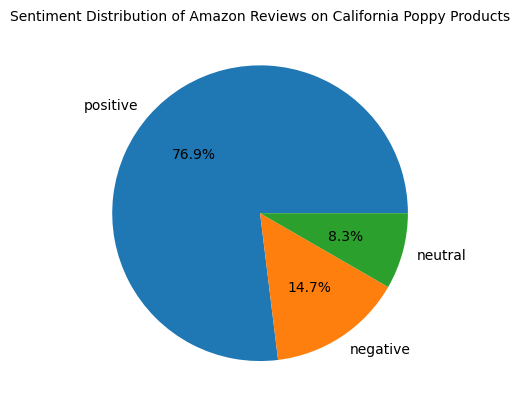

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

file.sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax,)
ax.set_ylabel('')
ax.set_title('Sentiment Distribution of Amazon Reviews on California Poppy Products', size = 10)
fig.savefig('sentiment_distribution.png', dpi = 300)

##### effective within 24 hrs

In [4]:
import re
effectiveness_pattern = r'\b(?:immediat\w*|fast\w*|\b\w*hour\w*\b|same day|instant\w*|overnight|rapid\w*|quick\w*|prompt\w*|within\w*\s+\d+\s*hour\w*|same\s+night|one\s+day|short\w*\s+time|quick\s+relief|in\s+no\s+time|in\s+a\s+few\s+hours|next\s+day|first\s+use|immediat\w+\s+result\w*|effective\s+right\s+away|almost\s+instantly)\b'

def extract_effectiveness_keywords(text):
    if pd.isna(text):
        return []
    return re.findall(effectiveness_pattern, text, flags=re.IGNORECASE)


file['effectiveness_keywords_in_review'] = (file.review_title.apply(extract_effectiveness_keywords) +
                                             file.review_body.apply(extract_effectiveness_keywords))
file['effectiveness_mentioned'] = file.effectiveness_keywords_in_review.apply(lambda x: len(x) > 0)

In [ ]:
import plotly.express as px

file_w_effect = file.groupby('asin').agg({'review_body':len, 'effectiveness_mentioned': 'mean'}).reset_index()

fig = px.histogram(file_w_effect, x="effectiveness_mentioned", 
                   histnorm='probability',)

fig.update_layout(
    title_text='Effectiveness Mentioned in Amazon Reviews',
    title_x=0.5,  # Center the title
    bargap=0.1,
    height=400,
    width=800,

)

fig.update_xaxes(title_text='Effectiveness Mentioned',)

fig.show()

fig.write_html('effectiveness_mentioned.html',)